In [1]:
import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from typing import Callable, Optional
from probe_model import DRCProbe
from create_probe_dataset import ProbingDataset
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt
import thinker
#import thinker.viz_utils as viz
import thinker.util as util
import gym
import gym_sokoban
import torch.nn.functional as F
import pandas as pd
import numpy as np

/home/tom/mlmi/dissertation/working_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-10 08:48:23,032	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.



In [4]:
val_data = torch.load("./data/train_data_full.pt")

In [7]:
val_data[0]["board_num"]

0

In [15]:
for v in val_data:
    print(v["board_num"])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14

In [19]:

for i in range(len(val_data)):
    if val_data[i]["board_num"] == 1:
        print(val_data[i]["box_loc"], val_data[i]["box_loc_change_loc"])

(28, 49, 50, 51) 49
(28, 49, 50, 51) 49
(28, 49, 50, 51) 49
(28, 49, 50, 51) 49
(28, 49, 50, 51) 49
(28, 49, 50, 51) 49
(28, 42, 49, 51) 42
(28, 34, 49, 51) 49
(28, 34, 49, 51) 49
(28, 34, 48, 51) 48
(28, 34, 48, 51) 48
(28, 34, 48, 51) 48
(28, 34, 40, 51) 40
(28, 32, 34, 51) 28
(24, 28, 34, 51) 24
(16, 28, 34, 51) 51
(16, 28, 34, 51) 51
(16, 28, 34, 51) 51
(16, 28, 34, 51) 51
(16, 28, 34, 51) 51
(16, 28, 34, 51) 51
(16, 28, 34, 51) 51
(16, 28, 34, 51) 51
(16, 28, 34, 43) 43
(16, 28, 34, 35) 34
(16, 27, 28, 34) 27
(16, 19, 28, 34) 28
(16, 19, 29, 34) 28
(16, 19, 29, 34) 28
(16, 19, 29, 34) 28
(16, 19, 29, 33) 28


In [6]:
results = pd.read_csv("./results/action_multi_random.csv")

In [7]:
weights = [float(s) for s in results["action_linear_layer2_channelhiddenxenc_tick3"][4].strip("[]").split(", ")]

In [51]:
weights = [0.1773, 0.0485, 0.1035, 0.5609, 0.1242, 0.1044, 0.0961, 0.1722, 0.1480,
        0.1609, 0.1480, 0.1818, 0.1854, 0.1300, 0.1218, 0.1099, 0.1905, 0.1437,
        0.1737, 0.0430, 0.1152, 0.4622, 0.6324, 0.1492, 0.3597, 0.1442, 0.5064,
        0.1224, 0.1815, 0.1140, 0.1977, 0.2997]

<BarContainer object of 64 artists>

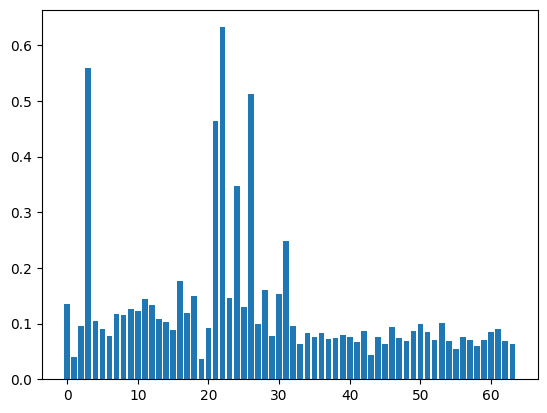

In [8]:
plt.bar(range(64), weights)

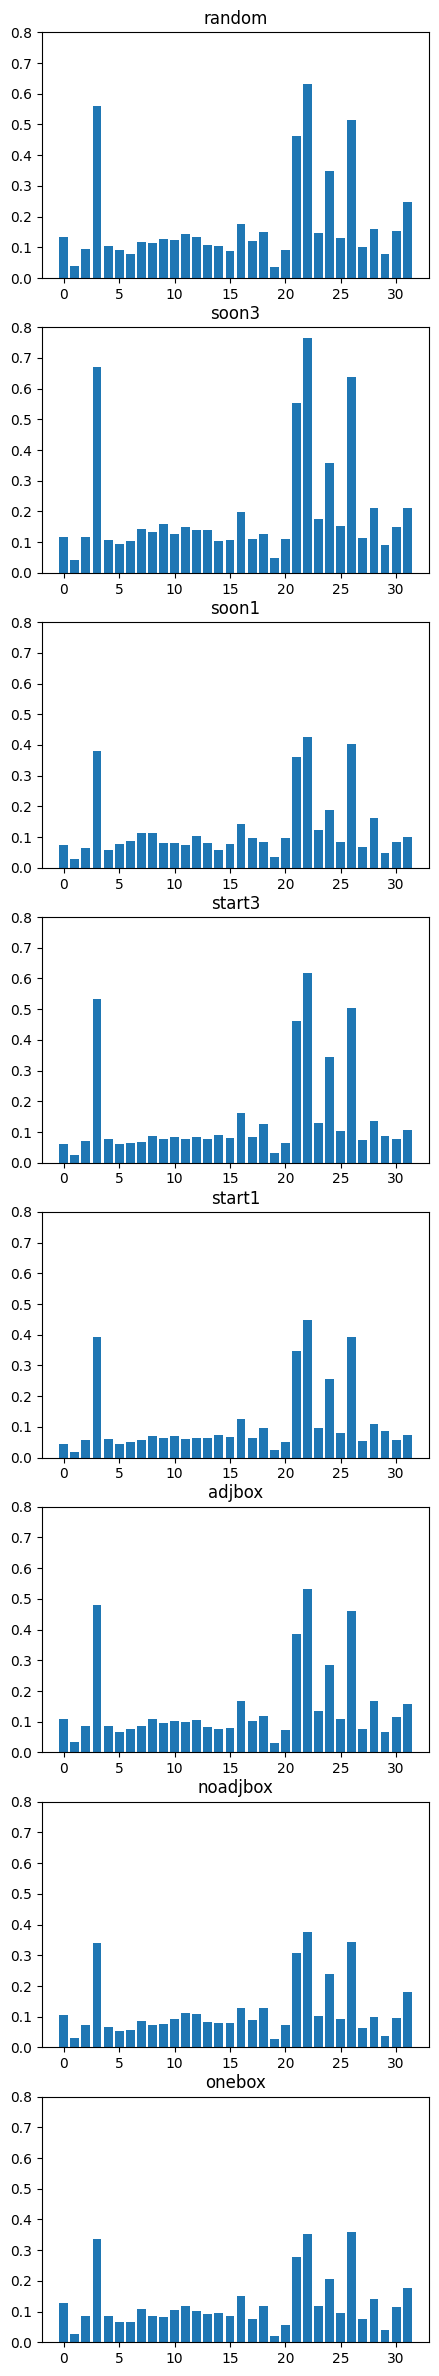

In [36]:
fig, axs = plt.subplots(8,1, figsize=(5,30))
all_weights = np.zeros((8,64))
for idx, subset in enumerate(["random", "soon3", "soon1", "start3", "start1", "adjbox", "noadjbox", "onebox"]):
    results = pd.read_csv(f"./results/action_multi_{subset}.csv")
    weights = [float(s) for s in results["action_linear_layer2_channelhiddenxenc_tick3"][4].strip("[]").split(", ")] 
    all_weights[idx,:] = [s / sum(weights) for s in weights]
    axs[idx].bar(range(32), weights[:32])
    axs[idx].set_title(subset)
    axs[idx].set_ylim(0,0.8)

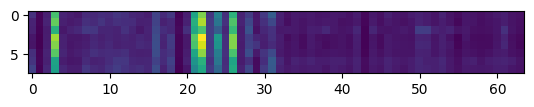

In [37]:
plt.imshow(all_weights)

In [51]:
feature = "action_ahead_1"
results = pd.read_csv(f"./results/{feature}_multi.csv")
test_accs = list(results.iloc[-1,1:].values[-1:]) + list(results.iloc[-1,1:].values[:3]) + list(results.iloc[-1,1:].values[4:6]) + list(results.iloc[-1,1:].values[7:-1])
labs = results.keys().to_list()[1:][:3] + results.keys().to_list()[1:][4:6] + results.keys().to_list()[1:][7:]
fig, ax = plt.subplots()
cols = ["purple"] + ["green"]*3 + ["blue"]*3 + ["red"]*3
labs = ["x_enc", "hidden_0", "cell_0", "hidden+x_enc_0", "hidden_1", "cell_1", "hidden+x_enc_1", "hidden_2", "cell_2", "hidden+x_enc_2"]
ax.bar(labs, test_accs, color=cols)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,1)
ax.set_ylabel("test acc (%)")
ax.set_title(f"Linear probe: {feature}")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './results/action_ahead_1_multi.csv'

In [6]:
results.iloc[-1,1:]

action_linear_layer2_channel[32]_tick3    0.285714
action_linear_layer2_channel[33]_tick3    0.243386
action_linear_layer2_channel[34]_tick3    0.248677
action_linear_layer2_channel[35]_tick3    0.455026
action_linear_layer2_channel[36]_tick3    0.333333
action_linear_layer2_channel[37]_tick3    0.206349
action_linear_layer2_channel[38]_tick3    0.322751
action_linear_layer2_channel[39]_tick3    0.291005
action_linear_layer2_channel[40]_tick3    0.291005
action_linear_layer2_channel[41]_tick3    0.328042
action_linear_layer2_channel[42]_tick3    0.359788
action_linear_layer2_channel[43]_tick3    0.222222
action_linear_layer2_channel[44]_tick3     0.31746
action_linear_layer2_channel[45]_tick3    0.301587
action_linear_layer2_channel[46]_tick3    0.312169
action_linear_layer2_channel[47]_tick3    0.338624
action_linear_layer2_channel[48]_tick3    0.402116
action_linear_layer2_channel[49]_tick3    0.291005
action_linear_layer2_channel[50]_tick3    0.301587
action_linear_layer2_channel[51

In [5]:
feature = "action"
results = pd.read_csv(f"./results/{feature}_indiv.csv")
list(results.iloc[-1,1:].values)

[0.2857142857142857,
 0.2433862433862433,
 0.2486772486772486,
 0.455026455026455,
 0.3333333333333333,
 0.2063492063492063,
 0.3227513227513227,
 0.291005291005291,
 0.291005291005291,
 0.328042328042328,
 0.3597883597883597,
 0.2222222222222222,
 0.3174603174603174,
 0.3015873015873015,
 0.3121693121693121,
 0.3386243386243386,
 0.4021164021164021,
 0.291005291005291,
 0.3015873015873015,
 0.2645502645502645,
 0.3174603174603174,
 0.7513227513227513,
 0.7301587301587301,
 0.3809523809523809,
 0.5555555555555556,
 0.2804232804232804,
 0.7777777777777778,
 0.2645502645502645,
 0.4232804232804232,
 0.2222222222222222,
 0.291005291005291,
 0.3121693121693121]

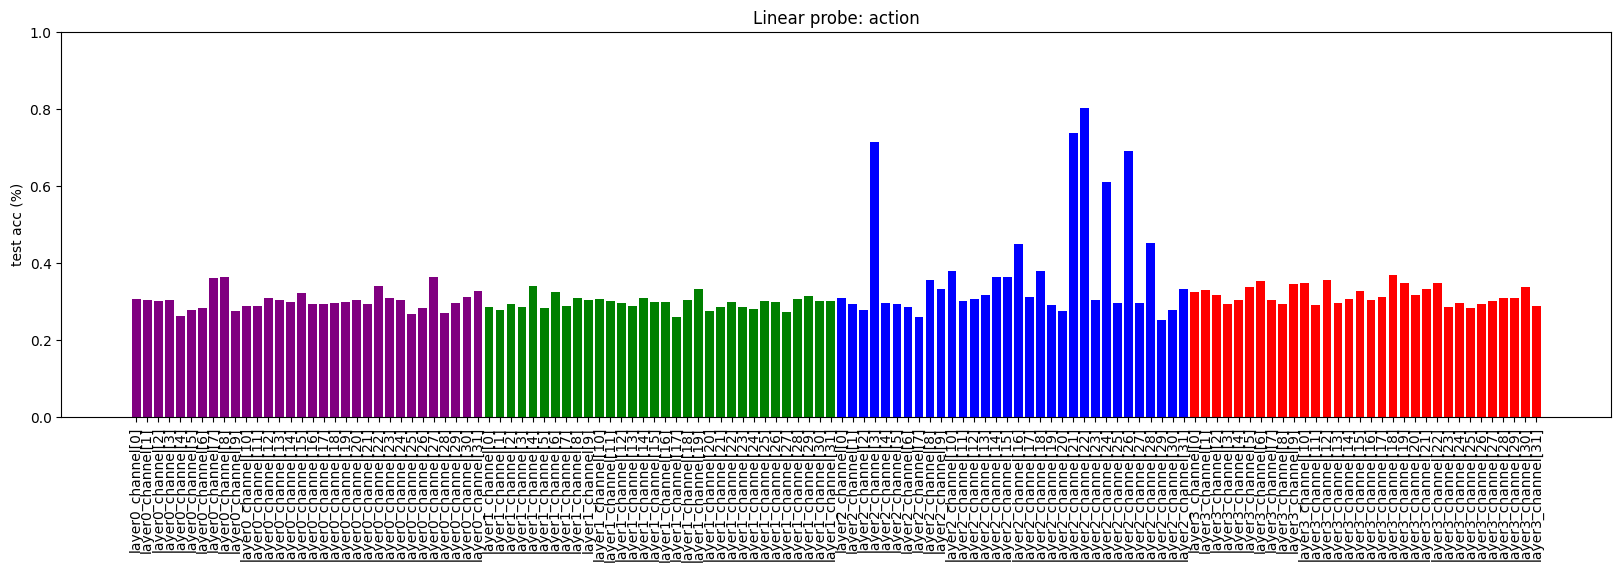

In [29]:
feature = "action"
results = pd.read_csv(f"./results/{feature}_indiv_random.csv")
test_accs = list(results.iloc[-1,1:])
labs = ["_".join(x.split("_")[-3:-1]) for x in results.keys().to_list()[1:]]
fig, ax = plt.subplots(figsize=(20,5))
color = ["purple"]*32 + ["green"]*32 + ["blue"]*32 + ["red"]*32
ax.bar(labs, test_accs, color=color)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,1)
ax.set_ylabel("test acc (%)")
ax.set_title(f"Linear probe: {feature}")
plt.show()

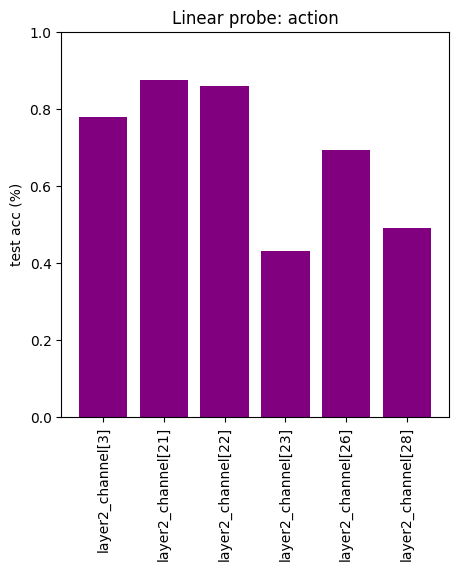

In [10]:
feature = "action"
results = pd.read_csv(f"./results/{feature}_indiv_soon2.csv")
test_accs = list(results.iloc[-1,1:])[-6:]
labs = ["_".join(x.split("_")[-3:-1]) for x in results.keys().to_list()[1:]][-6:]
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(labs, test_accs, color=color)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,1)
ax.set_ylabel("test acc (%)")
ax.set_title(f"Linear probe: {feature}")
plt.show()

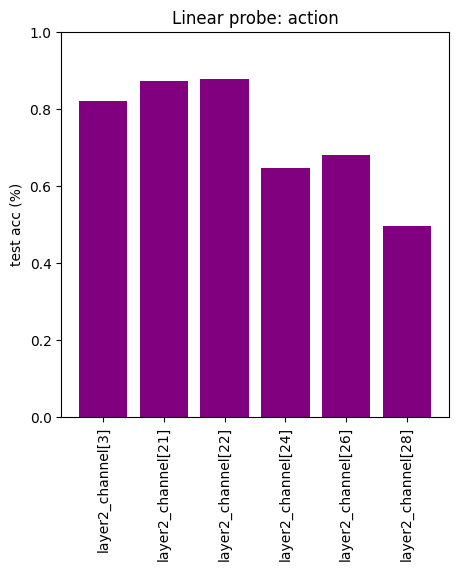

In [16]:
feature = "action"
results = pd.read_csv(f"./results/{feature}_indiv_soon1.csv")
test_accs = list(results.iloc[-1,1:])[-6:]
labs = ["_".join(x.split("_")[-3:-1]) for x in results.keys().to_list()[1:]][-6:]
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(labs, test_accs, color=color)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,1)
ax.set_ylabel("test acc (%)")
ax.set_title(f"Linear probe: {feature}")
plt.show()

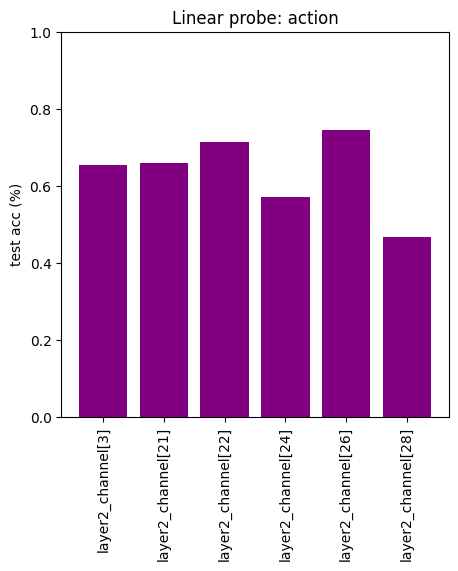

In [13]:
feature = "action"
results = pd.read_csv(f"./results/{feature}_indiv_start1.csv")
test_accs = list(results.iloc[-1,1:])[-6:]
labs = ["_".join(x.split("_")[-3:-1]) for x in results.keys().to_list()[1:]][-6:]
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(labs, test_accs, color=color)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,1)
ax.set_ylabel("test acc (%)")
ax.set_title(f"Linear probe: {feature}")
plt.show()

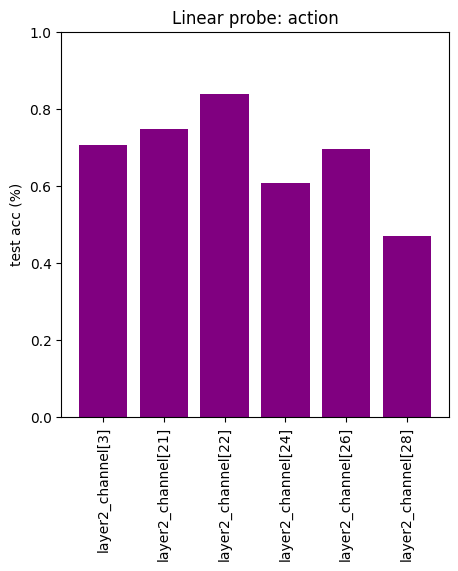

In [17]:
feature = "action"
results = pd.read_csv(f"./results/{feature}_indiv_1onebox.csv")
test_accs = list(results.iloc[-1,1:])[-6:]
labs = ["_".join(x.split("_")[-3:-1]) for x in results.keys().to_list()[1:]][-6:]
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(labs, test_accs, color=color)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,1)
ax.set_ylabel("test acc (%)")
ax.set_title(f"Linear probe: {feature}")
plt.show()

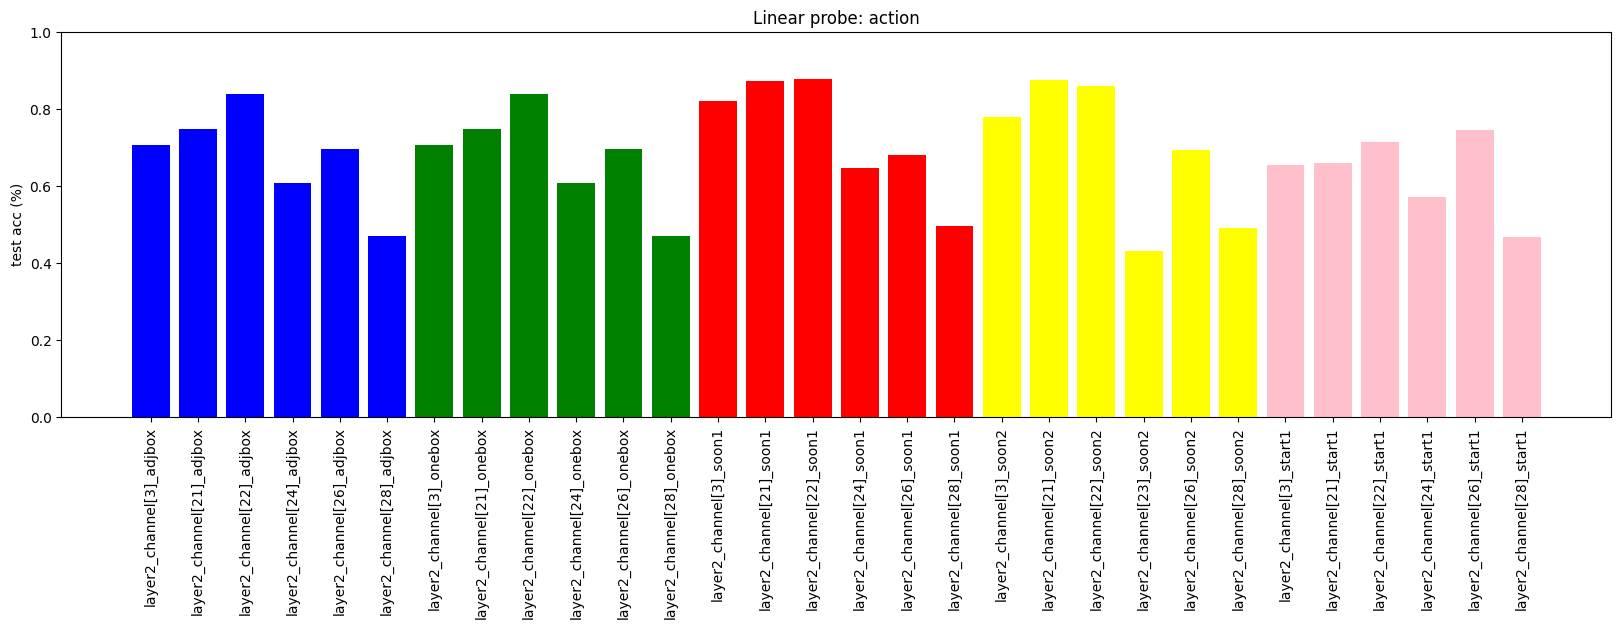

In [29]:
feature = "action"
results = pd.read_csv(f"./results/{feature}_indiv_1adjbox.csv")
test_accs = list(results.iloc[-1,1:])[-6:]
labs = ["_".join(x.split("_")[-3:-1] + ["adjbox"]) for x in results.keys().to_list()[1:]][-6:]
results = pd.read_csv(f"./results/{feature}_indiv_1onebox.csv")
test_accs += list(results.iloc[-1,1:])[-6:]
labs += ["_".join(x.split("_")[-3:-1] + ["onebox"]) for x in results.keys().to_list()[1:]][-6:]
results = pd.read_csv(f"./results/{feature}_indiv_soon1.csv")
test_accs += list(results.iloc[-1,1:])[-6:]
labs += ["_".join(x.split("_")[-3:-1] + ["soon1"]) for x in results.keys().to_list()[1:]][-6:]
results = pd.read_csv(f"./results/{feature}_indiv_soon2.csv")
test_accs += list(results.iloc[-1,1:])[-6:]
labs += ["_".join(x.split("_")[-3:-1] + ["soon2"]) for x in results.keys().to_list()[1:]][-6:]
results = pd.read_csv(f"./results/{feature}_indiv_start1.csv")
test_accs += list(results.iloc[-1,1:])[-6:]
labs += ["_".join(x.split("_")[-3:-1] + ["start1"]) for x in results.keys().to_list()[1:]][-6:]
cols = ["blue"] * 6 + ["green"] * 6 + ["red"] *6 + ["yellow"] * 6 + ["pink"] * 6
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(labs, test_accs, color=cols)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,1)
ax.set_ylabel("test acc (%)")
ax.set_title(f"Linear probe: {feature}")
plt.show()

In [38]:
results = pd.read_csv("./results/many_multi_random.csv")

In [57]:
maws_str = results.iloc[-1,:][1:].values
maws_arr = np.zeros((7,64))
for i,maws in enumerate(maws_str):
    maws = maws.strip("[]").split(", ")
    maws_arr[i,:] = [float(s) for s in maws]

In [85]:
results.iloc[-2,:][1:].values.tolist()

['0.9517388218594748',
 '0.6695652173913044',
 '0.5501945525291829',
 '1.0',
 '0.9361058601134216',
 '0.8404669260700389',
 '0.6000805477245268']

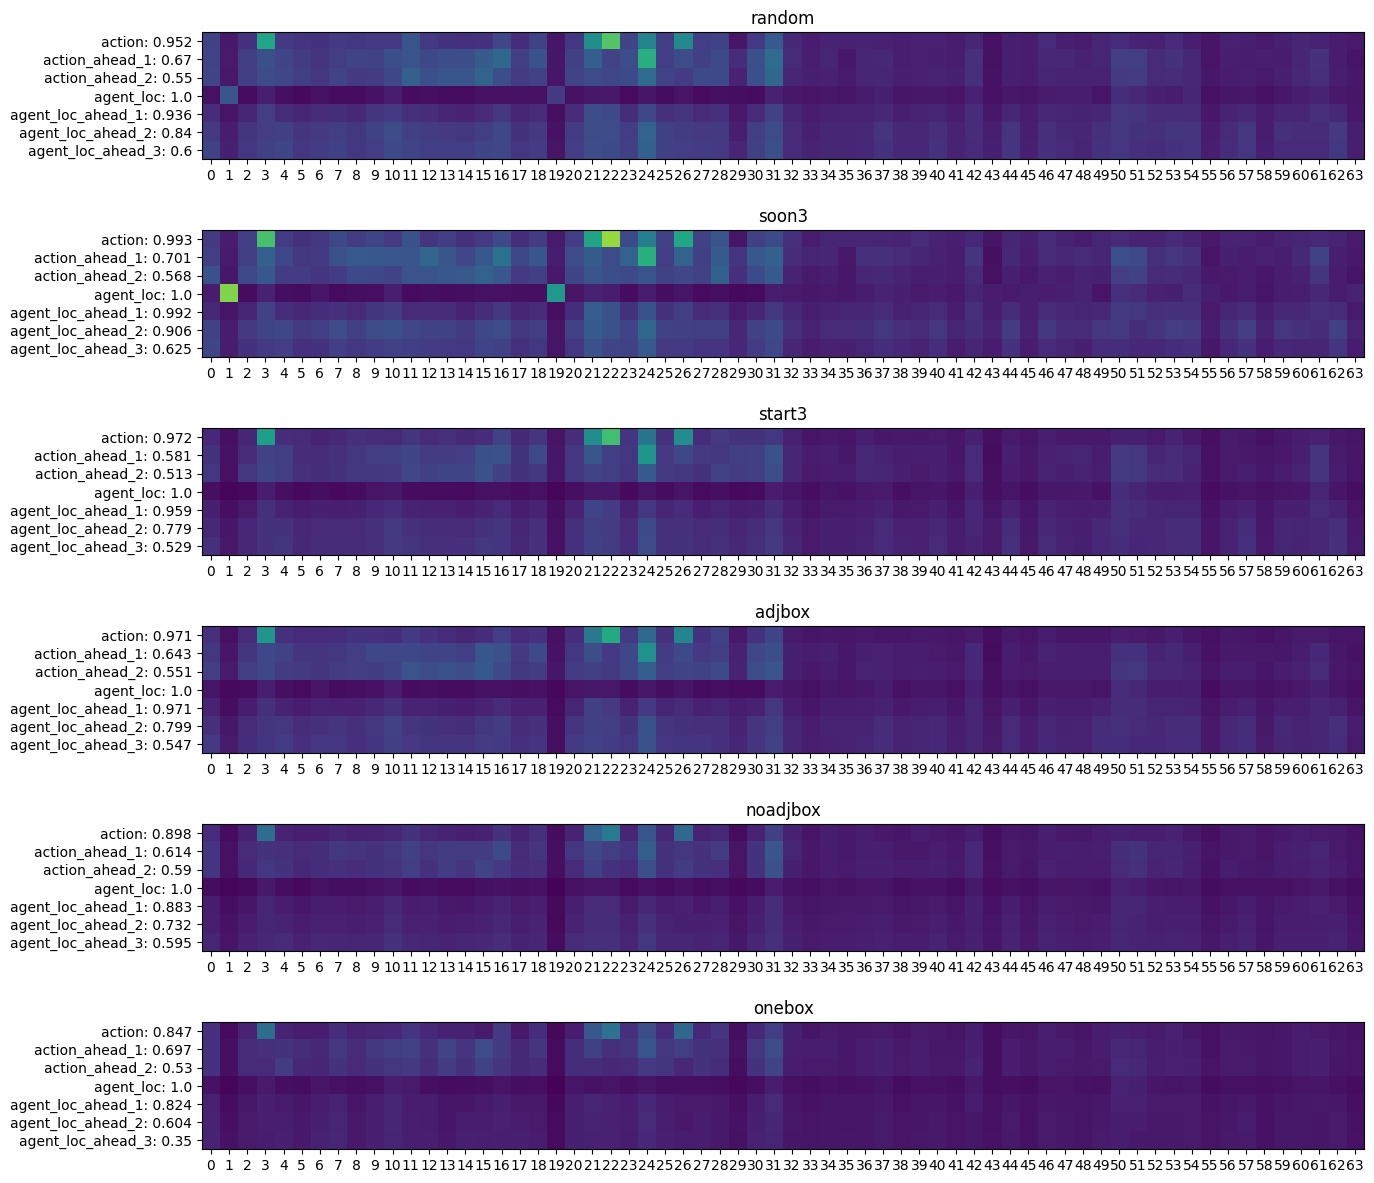

In [121]:
subsets = ["random", "soon3", "start3", "adjbox", "noadjbox", "onebox"]
fig, axs = plt.subplots(len(subsets),1,figsize=(15,15))
for idx, subset in enumerate(subsets):
    results = pd.read_csv(f"./results/many_multi_{subset}.csv")
    maws_str = results.iloc[-1,:][1:].values
    maws_arr = np.zeros((7,64))
    for j,maws in enumerate(maws_str):
        maws = maws.strip("[]").split(", ")
        maws_arr[j,:] = [float(s) for s in maws]
    feats = ["_".join(s.split("_")[:-4]) for s in list(results.iloc[-1,:][1:].keys())]
    test_accs = [str(round(float(s),3)) for s in results.iloc[-2,:][1:].values.tolist()]
    labels = [": ".join([feats[k],test_accs[k]]) for k in range(len(test_accs))]
    axs[idx].imshow(maws_arr[:,:], vmin=0, vmax=2)
    axs[idx].set_yticks(ticks=[0,1,2,3,4,5,6], labels=labels)
    axs[idx].set_xticks(range(64)[:])
    axs[idx].set_title(subset)
plt.show()